<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

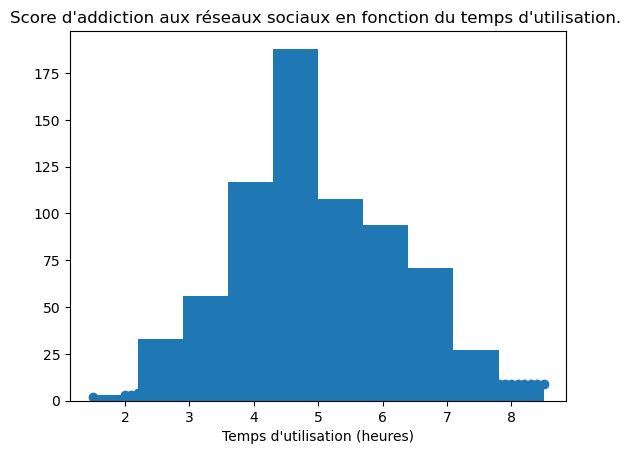

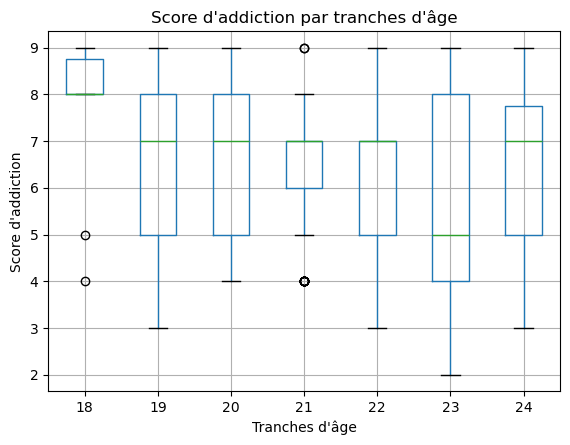

🧪 Analyse complétée — lance la cellule suivante pour tester ton travail.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données de students_social_media_addiction dans la varable df

df = pd.read_csv("students_social_media_addiction.csv")

# TODO 1 : Afficher les 5 premières lignes du dataset
df_head=df.head(5)


# TODO 2 : Afficher les informations générales (types, valeurs manquantes)
df.info()

# TODO 3 : Calculer la moyenne des heures d'utilisation quotidienne

temps_d_utilisation= df["Avg_Daily_Usage_Hours"]
moyenne= temps_d_utilisation.mean()


# TODO 4 : Créer un histogramme du temps d'utilisation des réseaux sociaux
plt.hist(temps_d_utilisation)

# TODO 5 : Créer un scatter plot entre l'utilisation des réseaux et le score d'addiction
score_d_addiction= df["Addicted_Score"]
x=temps_d_utilisation
y=score_d_addiction
plt.scatter(x, y)
plt.title("Score d'addiction aux réseaux sociaux en fonction du temps d'utilisation. ")
# TODO 6 : Calculer et afficher la corrélation entre les variables principales
correlation_matrix = df.select_dtypes(include='number').corr()
plt.xlabel("Temps d'utilisation (heures)")
print(f"Matrice de corrélation :", correlation_matrix)



# TODO 7 : Créer un boxplot du score d'addiction par tranches d'âge
df.boxplot(column="Addicted_Score", by="Age")
plt.title("Score d'addiction par tranches d'âge")
plt.suptitle("")
plt.xlabel("Tranches d'âge")
plt.ylabel("Score d'addiction")
plt.show()

print("🧪 Analyse complétée — lance la cellule suivante pour tester ton travail.")


📊 Résultats des tests :
✅ Test 1 : df.head() exécuté correctement.
✅ Test 2 : Colonnes nécessaires présentes.
✅ Test 3 : Moyenne du temps d'utilisation calculée.
✅ Test 4 : Corrélation entre les variables calculée.
✅ Test 5 : Histogramme généré.
✅ Test 6 : Scatter plot généré.
❌ Test 7 : Boxplot non généré ou erreur : The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


<Figure size 640x480 with 0 Axes>

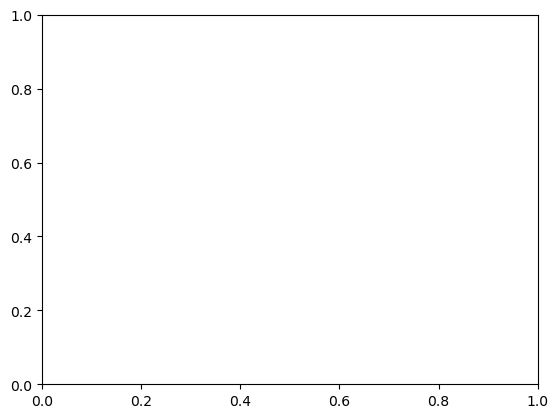

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def test_data_analysis(df, df_head=None, moyenne=None, correlation_matrix=None):
    results = []

    # ✅ Test 1 : Les 5 premières lignes doivent être dans un DataFrame et contenir exactement 5 lignes
    try:
        assert isinstance(df_head, pd.DataFrame), "df_head doit être un DataFrame"
        assert len(df_head) == 5, "df_head doit contenir exactement 5 lignes"
        results.append("✅ Test 1 : df.head() exécuté correctement.")
    except Exception as e:
        results.append(f"❌ Test 1 : df.head() manquant ou incorrect : {e}")

    # ✅ Test 2 : Vérifier que df contient toutes les colonnes attendues
    expected_cols = {
        "Student_ID", "Age", "Avg_Daily_Usage_Hours",
        "Sleep_Hours_Per_Night", "Mental_Health_Score",
        "Conflicts_Over_Social_Media", "Addicted_Score"
    }
    try:
        assert expected_cols.issubset(set(df.columns))
        results.append("✅ Test 2 : Colonnes nécessaires présentes.")
    except:
        results.append(f"❌ Test 2 : Il manque certaines colonnes : {expected_cols - set(df.columns)}")

    # ✅ Test 3 : Moyenne calculée
    try:
        assert isinstance(moyenne, (float, int)), "moyenne doit être un nombre"
        assert moyenne > 0 and moyenne < 24, "valeur moyenne incohérente"
        results.append("✅ Test 3 : Moyenne du temps d'utilisation calculée.")
    except Exception as e:
        results.append(f"❌ Test 3 : Erreur dans le calcul de la moyenne : {e}")

    # ✅ Test 4 : Corrélation calculée entre colonnes
    try:
        assert isinstance(correlation_matrix, pd.DataFrame)
        assert "Addicted_Score" in correlation_matrix.columns
        assert "Avg_Daily_Usage_Hours" in correlation_matrix.columns
        results.append("✅ Test 4 : Corrélation entre les variables calculée.")
    except Exception as e:
        results.append(f"❌ Test 4 : Corrélation non calculée ou incomplète : {e}")

    # ✅ Test 5 : Histogramme généré
    try:
        fig1 = plt.figure()
        n, bins, patches = plt.hist(df["Avg_Daily_Usage_Hours"], bins=10)
        assert len(n) > 0 and np.sum(n) > 0, "Histogramme vide"
        plt.close(fig1)
        results.append("✅ Test 5 : Histogramme généré.")
    except Exception as e:
        results.append(f"❌ Test 5 : Histogramme non généré correctement : {e}")

    # ✅ Test 6 : Scatter plot généré
    try:
        fig2 = plt.figure()
        plt.scatter(df["Avg_Daily_Usage_Hours"], df["Addicted_Score"])
        plt.close(fig2)
        results.append("✅ Test 6 : Scatter plot généré.")
    except Exception as e:
        results.append(f"❌ Test 6 : Scatter plot incorrect : {e}")

    # ✅ Test 7 : Boxplot par tranche d'âge
    try:
        fig3 = plt.figure()
        df.boxplot(column="Addicted_Score", by=pd.cut(df["Age"], bins=[10,15,20,25]))
        plt.close(fig3)
        results.append("✅ Test 7 : Boxplot par tranche d'âge généré.")
    except Exception as e:
        results.append(f"❌ Test 7 : Boxplot non généré ou erreur : {e}")

    # Affichage final
    print("\n📊 Résultats des tests :")
    for result in results:
        print(result)

# Appel automatique du test (ne rien modifier ici)
test_data_analysis(df, df_head, moyenne, correlation_matrix)


In [11]:
addiction_des_eleves_aux_reseaux_sociaux= pd.read_csv("students_social_media_addiction.csv")
addiction_des_eleves_aux_reseaux_sociaux.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000
